In [5]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm


from sklearn.neighbors import KNeighborsRegressor


from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# from sklearn import metrics
# Classification model metrics modules
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix


#Pipeline and grid search modules

from sklearn.model_selection import GridSearchCV


print('finished imports')

finished imports


In [6]:
# cd C:\Users\pozzo\Desktop\SAC\Data Science\GA DS Immersive\Projects\project_4_hackathon\data

In [7]:
#initial look at data

eatz_0 = pd.read_csv("../data/test.csv")

print(eatz_0.shape)
eatz_0.head(3)

(100000, 42)


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0


In [8]:
eatz_0.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37'],
      dtype='object')

In [9]:
# check columns for compromised data; it's all good

eatz_0.isnull().sum();

## EDA Phase 1
## Inspect and engineer columns 

In [10]:
eatz_0.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
Id            100000 non-null int64
Open Date     100000 non-null object
City          100000 non-null object
City Group    100000 non-null object
Type          100000 non-null object
P1            100000 non-null int64
P2            100000 non-null float64
P3            100000 non-null float64
P4            100000 non-null float64
P5            100000 non-null int64
P6            100000 non-null int64
P7            100000 non-null int64
P8            100000 non-null int64
P9            100000 non-null int64
P10           100000 non-null int64
P11           100000 non-null int64
P12           100000 non-null int64
P13           100000 non-null float64
P14           100000 non-null int64
P15           100000 non-null int64
P16           100000 non-null int64
P17           100000 non-null int64
P18           100000 non-null int64
P19           100000 non-null int64
P20           

In [11]:
# inspect variable Open Date towards determing age of restaurants

gb_Open_date=eatz_0.groupby(['Open Date']).count()
gb_Open_date.shape
# type(eatz_0['Open Date'][0])


(310, 41)

In [12]:
# convert 'Open Date' to date format
# https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

eatz_0['Open Date']= pd.to_datetime(eatz_0['Open Date'])

In [13]:
# add an age column and inspect ditribution of ages  zzzzzzzzzz

eatz_0['open_year'] = eatz_0['Open Date'].dt.year
eatz_0['age'] = 2020 - eatz_0['open_year']
eatz_0['age'].describe()

count    100000.00000
mean         11.78995
std           4.78036
min           6.00000
25%           8.00000
50%          10.00000
75%          13.00000
max          25.00000
Name: age, dtype: float64

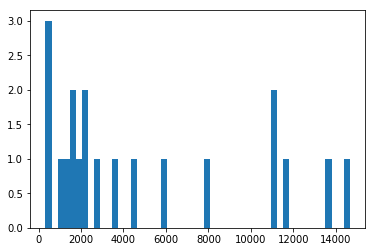

In [14]:
gb_age=eatz_0.groupby(['age']).count()
gb_age=eatz_0.groupby(['age']).count()

age_buff = gb_age['Id']
age_buff
plt.hist(age_buff, bins=50);
# gb_age
# gb_age.shape

In [15]:
eatz_0['rev_2'] =np.log10(eatz_0['revenue'])
eatz_0['rev_2'].describe()
plt.hist(eatz_0['rev_2'], bins=50);


KeyError: 'revenue'

In [ ]:
plt.hist(eatz_0['revenue'], bins=50);

In [ ]:
# inspect categorical variable City Group; how many categories are there?
# There are two - Big Cities and Other
# Dummify

gb_City_Group=eatz_0.groupby(['City Group']).count()
gb_City_Group.shape

In [269]:
# Dummify "City Group"

eatz_1 = pd.get_dummies(columns=["City Group"], drop_first=True, data=eatz_0)

In [270]:
# inspect categorical variable Type; how many categories are there?
# There are three - FC: Food Curt; IL: Inline (strip mall); DT: Drive-thru
# Dummify

gb_Type=eatz_0.groupby(['Type']).count()
gb_Type=eatz_0.groupby(['Type']).count()
gb_Type.shape

(3, 45)

In [271]:
# Dummify "Type"

eatz_1 = pd.get_dummies(columns=["Type"], drop_first=True, data=eatz_1)

In [272]:
eatz_1.columns

Index(['Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'open_year', 'age', 'rev_2', 'City Group_Other', 'Type_FC',
       'Type_IL'],
      dtype='object')

In [273]:
col_name="revenue"
rev_col=eatz_1.pop(col_name)
eatz_1.insert(0, col_name, rev_col)
eatz_1.head(4)


,revenue,Id,Open Date,City,P1,P2,P3,P4,P5,P6,...,P34,P35,P36,P37,open_year,age,rev_2,City Group_Other,Type_FC,Type_IL
0,5653753.0,0,1999-07-17,İstanbul,4,5.0,4.0,4.0,2,2,...,5,4,3,4,1999,21,6.752337,0,0,1
1,6923131.0,1,2008-02-14,Ankara,4,5.0,4.0,4.0,1,2,...,0,0,0,0,2008,12,6.840303,0,1,0
2,2055379.0,2,2013-03-09,Diyarbakır,2,4.0,2.0,5.0,2,3,...,0,0,0,0,2013,7,6.312892,1,0,1
3,2675511.0,3,2012-02-02,Tokat,6,4.5,6.0,6.0,4,4,...,18,12,12,6,2012,8,6.427407,1,0,1


## EDA

## Null model

In [274]:
eatz_1['revenue'].mean()

4453532.613138686

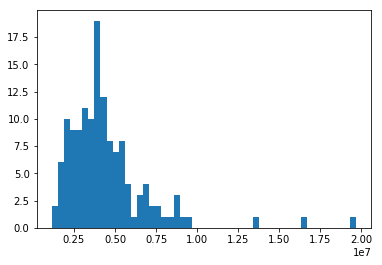

In [275]:
# eatz_1['revenue']

plt.hist(eatz_1['revenue'], bins=50);

In [276]:
eatz_1 = eatz_1.drop(eatz_1[eatz_1['revenue'] > 10000000].index)
eatz_1.shape

(134, 47)

In [277]:
# inspect data's descriptive statistics
eatz_1.describe()
eatz_1.columns

Index(['revenue', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'open_year', 'age', 'rev_2', 'City Group_Other', 'Type_FC',
       'Type_IL'],
      dtype='object')

In [278]:
cols_list=eatz_1.columns
cols_list

Index(['revenue', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'open_year', 'age', 'rev_2', 'City Group_Other', 'Type_FC',
       'Type_IL'],
      dtype='object')

In [279]:
features = ['revenue', 'rev_2', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'open_year', 'age', 'City Group_Other', 'Type_FC', 'Type_IL']

In [280]:
eatz_X=eatz_1[features]
Corrs=eatz_X.corr()
# Corrs['0']

# https://stackoverflow.com/questions/15360925/how-to-get-the-first-column-of-a-pandas-dataframe-as-a-series

# Corrs.columns
# Corrs.iloc[:,0].sort_values(by=['revenue'])

Corrs.sort_values(by=['revenue'], ascending=False)
# Corrs['revenue']

,revenue,rev_2,Id,P1,P2,P3,P4,P5,P6,P7,...,P33,P34,P35,P36,P37,open_year,age,City Group_Other,Type_FC,Type_IL
revenue,1.000000,0.963103,0.035886,0.106975,0.217491,0.011755,0.057928,0.002373,0.125315,0.102491,...,0.010659,-0.068246,-0.038330,-0.038126,0.003478,-0.202740,0.202740,-0.211989,0.086291,-0.083323
rev_2,0.963103,1.000000,0.036653,0.127019,0.215257,0.043077,0.084395,0.030545,0.156076,0.130189,...,0.059618,-0.030041,0.002072,0.002028,0.063449,-0.242897,0.242897,-0.181963,0.038858,-0.038850
P2,0.217491,0.215257,-0.036334,0.838885,1.000000,0.477588,0.542889,0.206367,0.672183,0.773089,...,0.238867,0.397430,0.317964,0.391217,0.163148,-0.161109,0.161109,-0.417732,-0.130702,0.144693
age,0.202740,0.242897,0.130339,0.091001,0.161109,0.028092,-0.011922,-0.115942,0.175689,0.001588,...,0.135228,0.091608,0.051479,0.106275,0.174345,-1.000000,1.000000,-0.148095,-0.091217,0.076489
P28,0.190908,0.218903,0.028128,0.845818,0.734997,0.649976,0.644160,0.330666,0.734705,0.745602,...,0.265814,0.450661,0.340990,0.455599,0.212866,-0.122720,0.122720,-0.296379,-0.095277,0.103271
P6,0.125315,0.156076,-0.020874,0.751361,0.672183,0.575940,0.600422,0.330282,1.000000,0.742725,...,0.307028,0.525265,0.419852,0.530788,0.333469,-0.175689,0.175689,-0.412403,-0.159960,0.148561
P23,0.114357,0.160208,-0.001658,0.702550,0.518695,0.602103,0.558196,0.356427,0.492507,0.652238,...,0.318103,0.473079,0.404140,0.452355,0.220578,-0.044638,0.044638,-0.012654,-0.215070,0.220207
P1,0.106975,0.127019,-0.030411,1.000000,0.838885,0.697242,0.677659,0.305929,0.751361,0.854802,...,0.331468,0.572795,0.451969,0.557497,0.279780,-0.091001,0.091001,-0.261099,-0.174715,0.190482
P7,0.102491,0.130189,-0.082213,0.854802,0.773089,0.651155,0.702271,0.446302,0.742725,1.000000,...,0.339605,0.563571,0.459909,0.545259,0.311692,-0.001588,0.001588,-0.198472,-0.162402,0.191487
Type_FC,0.086291,0.038858,0.205303,-0.174715,-0.130702,-0.130333,-0.082443,-0.075372,-0.159960,-0.162402,...,-0.696227,-0.516301,-0.635282,-0.568822,-0.626889,0.091217,-0.091217,0.133559,1.000000,-0.984999


### Correlations analysis

1. Strongest correlation to 'revenue' is age.  Since this is a feature that a new restaurant can't posses, by definition. this feauture should be ignored in prospective models.

2. Drop 'Id'


In [281]:
# plt.figure(figsize=(12,12))
# sns.heatmap(eatz_1.corr(), annot=True)
# sns.pairplot(eatz_1)

In [282]:
eatz_1.columns

Index(['revenue', 'Id', 'Open Date', 'City', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'open_year', 'age', 'rev_2', 'City Group_Other', 'Type_FC',
       'Type_IL'],
      dtype='object')

In [283]:
# features =['City Group_Other', 'Type_FC', 'Type_IL', 'P1', 'P2', 'P3', 'P4', 'P5',
#            'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
#            'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26','P27',
#            'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36','P37'
#           ]


features =[
            'P1', 'P2', 'P6', 'P7', 'P23', 'P28', 'City Group_Other'
          ]

X = eatz_1[features]
y = eatz_1['rev_2']

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [285]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [286]:
lr.score(X_train, y_train)

0.08448903579174583

In [287]:
cross_val_score(lr, X_train, y_train, cv=5)

array([-0.19846425, -0.03077746, -0.03010962, -0.01640305,  0.02394405])

In [288]:
lr.coef_

array([-0.02416544,  0.01682344, -0.00538271,  0.00042467,  0.01039952,
        0.01294611, -0.06386344])

In [289]:
X=sm.add_constant(X)
Model_sm=sm.OLS(y, X).fit()
    
    # coefficients from Statsmodel OLS model
# print(Model_sm.params)
Model_sm.params


C:\Users\pozzo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const               6.465748
P1                 -0.031050
P2                  0.040025
P6                  0.002191
P7                 -0.003237
P23                 0.006327
P28                 0.021328
City Group_Other   -0.034341
dtype: float64

In [290]:
# Model_sm.mse_resid*Model_sm.nobs
# Model_sm.mse_resid
# # MSE**.5
# Model_sm.rsquared
# Model_sm.rsquared_adj   
# Model_sm.fvalue
# Model_sm.f_pvalue 
Model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rev_2   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.128
Date:                Mon, 02 Nov 2020   Prob (F-statistic):             0.0452
Time:                        15:33:37   Log-Likelihood:                 41.294
No. Observations:                 134   AIC:                            -66.59
Df Residuals:                     126   BIC:                            -43.40
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.4657      0.076     84.609      0.000       6.315       6.617
P1                  -0.0311      0.015     -2.060      0.041      -0.061      -0.001
P2                   0.0400      0.022      1.848      0.067      -0.003       0.083
P6                   0.0022      0.013      0.166      0.869      -0.024       0.028
P7                  -0.0032      0.015     -0.220      0.826      -0.032       0.026
P23                  0.0063      0.006      1.124      0.263      -0.005       0.017
P28                  0.0213      0.015      1.444      0.151      -0.008       0.051
City Group_Other    -0.0343      0.040     -0.868      0.387      -0.113       0.044
==============================================================================
Omnibus:                        1.384   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                1.386
Skew:                          -0.239   Prob(JB):                        0.500
Kurtosis:                       2.863   Cond. No.                         59.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [291]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\pozzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [292]:
ols = LinearRegression()
ols.fit(Z_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [293]:
print(ols.score(Z_train, y_train))
print(ols.score(Z_test, y_test))

0.08448903579174583
0.05815632276663618


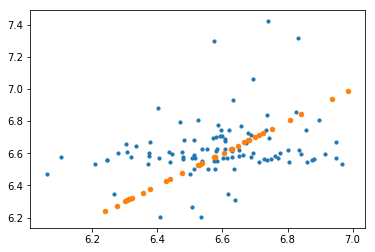

In [294]:
# Make predictions
y_pred_train = ols.predict(X_train)
y_pred_test = ols.predict(X_test)
# Create residuals (aka errors): (y - y_hat)
resids_train = y_train - y_pred_train
resids_test = y_test - y_pred_test
plt.scatter(y_train, y_pred_train, s=10);
plt.scatter(y_test, y_test, s=20);

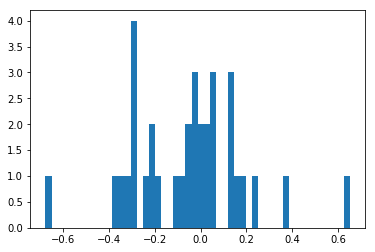

In [295]:
plt.hist(resids_test, bins=50);

In [296]:
# Ridge regressor lives here:# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_train, y_train)

# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_model.fit(Z_train, y_train)

# Here is the optimal value of alpha
ridge_cv.alpha


10

In [297]:
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.07803315876139127
0.037664845227914134


## KNN regressor model

In [298]:
# features =['City Group_Other', 'Type_FC', 'Type_IL', 'P1', 'P2', 'P3', 'P4', 'P5',
#            'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
#            'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26','P27',
#            'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36','P37'
#           ]


# features =['City Group_Other', 'Type_FC', 'Type_IL', 'P2', 'P6', 'P8', 'P13', 'P28', 'P29'
#           ]

X = eatz_1[features]
y = eatz_1['revenue']

In [299]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [300]:
ss = StandardScaler()           # normalizes data to Z-score, stds from mean
ss.fit(X_train)                 # ONLY FIT TO X_TRAIN, NEVER TO TEST!!!!

# X_train_sc
X_train_sc = ss.transform(X_train)      # transform data to Z-score basis

# X_test_sc
X_test_sc = ss.transform(X_test)

C:\Users\pozzo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pozzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\pozzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [301]:
knn_gridsearch = GridSearchCV(estimator=KNeighborsRegressor(),
                              param_grid = {'n_neighbors': range(2, 4, 8),
                                              'metric': ['euclidean', 'manhattan']
                                              },
                              cv=5, # What number of folds in CV will we use?
                              verbose=1)

# Fit the GridSearchCV object to the data.
knn_gridsearch.fit(X_train_sc, y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


rmse_knn:  5215663268176.515


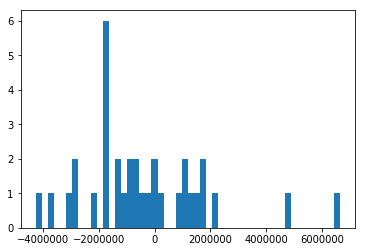

In [302]:
y_test_preds = knn_gridsearch.predict(X_test)
resids = y_test - y_test_preds
plt.hist(resids, bins=50);

rmse_knn_test = mean_squared_error(y_test, y_test_preds)
rmse_knn_train = mean_squared_error(y_test, y_test_preds)
print('rmse_knn: ', rmse_knn_test )